In [7]:
import pandas as pd
import numpy as np
import xgboost
from sklearn.metrics import roc_curve, auc, confusion_matrix, roc_auc_score
import seaborn as sns
import matplotlib.pyplot as plt
import xgboost
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings('ignore')
import pickle
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
processed_data_file = "diabetes.csv"
data = pd.read_csv(processed_data_file)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [3]:
independent_columns  = ['Pregnancies','Glucose', 'BloodPressure',
       'SkinThickness', 'Insulin',
       'BMI',
       'DiabetesPedigreeFunction', 'Age']

X =  data.loc[:, independent_columns]
y =  data['Outcome']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size =  0.2, random_state =  4)

xgb_full = xgboost.DMatrix(X, label=y)
xgb_train =  xgboost.DMatrix(X_train, label = y_train)
xgb_test = xgboost.DMatrix(X_test, label = y_test)

params = {
"eta": 0.002,
"max_depth": 4,
"objective": 'binary:logistic',
"eval_metric":"auc",
"subsample": 0.5
}
model = xgboost.train(params, xgb_full, 10000, evals = [(xgb_test, "test")], verbose_eval= 1000)
xgboost.cv(params,xgb_full, nfold = 3, metrics="auc" , num_boost_round=10)
data['pred'] = model.predict(xgb_full)

[0]	test-auc:0.86859
[1000]	test-auc:0.924774
[2000]	test-auc:0.93948
[3000]	test-auc:0.959465
[4000]	test-auc:0.973416
[5000]	test-auc:0.9819
[6000]	test-auc:0.991704
[7000]	test-auc:0.996606
[8000]	test-auc:0.998115
[9000]	test-auc:0.999246
[9999]	test-auc:0.999811


In [16]:
point = np.random.uniform(0,10, size = (3,8))

model.predict(xgboost.DMatrix(point,feature_names= independent_columns))

array([0.09141634, 0.04207631, 0.02884767], dtype=float32)

# Creating Linear dataset

(0, 1)

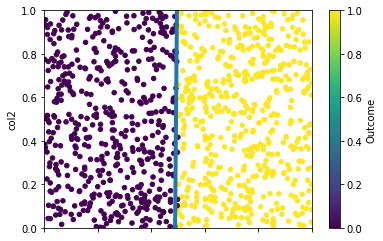

In [51]:
data = np.random.uniform(0,1, size= (1000,2))
df = pd.DataFrame(data)
df.columns = ['col1', 'col2']
df['Outcome'] = df['col1']> 0.5
df['Outcome'] = df['Outcome'].astype(int)
y = df['Outcome'].values
model = LogisticRegression()
model.fit(data, y)
df.plot.scatter('col1', 'col2', c= 'Outcome', colormap='viridis')
plt.plot(points_x, points_y, linewidth  = 4 )
plt.xlim(0,1)
plt.ylim(0,1)

# Creating Non Linear Toy dataset

In [31]:
def outcome_function(row):
    if (0.15 <=row['col1'] <= 0.85) & (0.15 <=row['col2'] <= 0.85) :
        return 0
    else:
        return 1

In [48]:
data = np.random.uniform(0,1, size= (1000,2))
df = pd.DataFrame(data)
df.columns = ['col1', 'col2']
df['Outcome'] = df.apply(outcome_function, axis = 1)
df.to_csv("toy_linear.csv", index = False)

# df['Outcome'] = df['Outcome'].astype(int)
# df.to_csv("toy_linear.csv", index = False)

(0, 1)

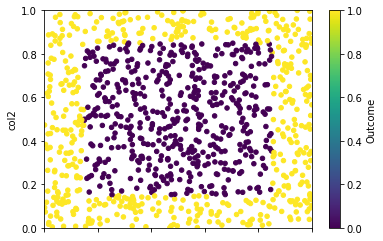

In [50]:

y = df['Outcome'].values
model = LogisticRegression()
model.fit(data, y)
df.plot.scatter('col1', 'col2', c= 'Outcome', colormap='viridis')
plt.xlim(0,1)
plt.ylim(0,1)

In [36]:
df.to_csv("toy_non_linear.csv", index = False)

In [35]:
pt = np.random.uniform(0,1,(1,2))
pred1 = model.predict(pt)
pred = model.predict(data)
accuracy_score(y, pred)

0.509

In [40]:
x = np.arange(0.1, 0.9, 0.1)
y = np.arange(0.1, 0.9, 0.1)
points = []
for x_i in x:
    for y_i in y:
        points.append([x_i, y_i])
points = np.array(points)
points.shape

(64, 2)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a258a08d0>]],
      dtype=object)

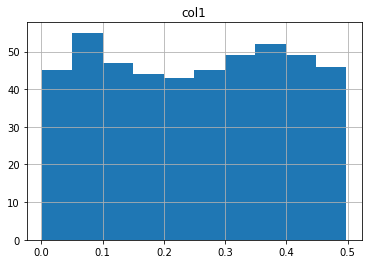

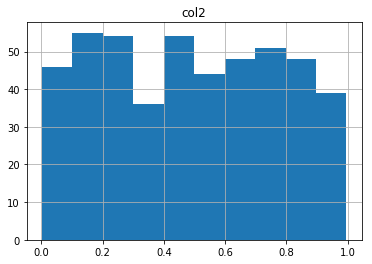

In [88]:
a = df[df['Outcome'] == 0]
a.hist('col1')
a.hist('col2')

# increased dimensions

In [47]:
for dim in range(2,8):
    data = np.random.uniform(0,1, size= (1000,dim))
    df = pd.DataFrame(data)
    cols = []
    for i in range(dim):
        cols.append("col"+ str(i+1))
    df.columns = cols
    df['Outcome'] = df['col1']> 0.5
    df['Outcome'] = df['Outcome'].astype(int)
    file_name = "toy_linear_" + str(dim) + ".csv"
    df.to_csv(file_name, index = False)

In [44]:
np.arange(0.1, 0.91, 0.1)

array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9])